## Logistic Classifier Basic

In [1]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

In [2]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

In [3]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [4]:
# sigmoid == Logistic 
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost function of logistic regression
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

# gradient descent optimizer for cost function
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

Logistic Classifier의 cost function
￼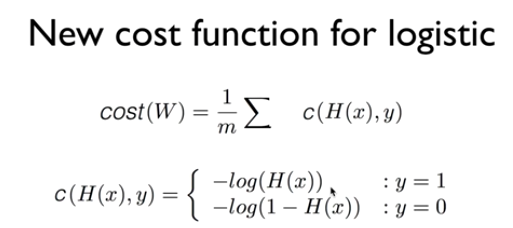

In [5]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [11]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                    feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.7307833
200 0.5715119
400 0.5074139
600 0.4718242
800 0.44758478
1000 0.42857108
1200 0.41232464
1400 0.39775506
1600 0.38433787
1800 0.37180105
2000 0.35999325
2200 0.34882215
2400 0.33822623
2600 0.32816052
2800 0.31858906
3000 0.30948088
3200 0.30080852
3400 0.29254702
3600 0.28467283
3800 0.27716395
4000 0.2699997
4200 0.26316056
4400 0.2566281
4600 0.2503851
4800 0.24441504
5000 0.23870273
5200 0.23323363
5400 0.22799431
5600 0.22297198
5800 0.21815477
6000 0.21353154
6200 0.20909168
6400 0.20482557
6600 0.20072372
6800 0.1967777
7000 0.19297928
7200 0.18932094
7400 0.18579553
7600 0.18239634
7800 0.17911713
8000 0.17595184
8200 0.17289506
8400 0.16994144
8600 0.16708624
8800 0.16432472
9000 0.16165248
9200 0.15906551
9400 0.1565599
9600 0.15413192
9800 0.15177831
10000 0.14949557

Hypothesis:  [[0.03074028]
 [0.15884678]
 [0.30486736]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


10000번 돌렸을 때 loss 0.15
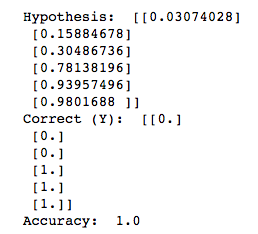
hypothesis 값: 학습한 w, b를 각 x 인풋과 결합했을 때 결과값
predicted: hypo가 0.5 이상인 경우

accuracy가 왜 1이 나오는가,,

### Tensorflow code

- tf.cast (x, dtype)
cast x value into dtype
ex. tf.cast(1, dtype=float) -> 1이라는 정수형을 실수형으로 맵핑